In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import jieba
import matplotlib.pyplot as plt
import seaborn as sns
from pyecharts import Geo





In [3]:
f = open('狄仁杰.txt',encoding='UTF-8')
data = pd.read_csv(f,sep=',',header=None,encoding='UTF-8',names=['date','nickname','city','rate','comment'])

city = data.groupby(['city'])
rate_group = city['rate']
city_com = city['city'].agg(['count'])
city_com.reset_index(inplace=True)

In [ ]:
# 生成地图的热图
data_map = [(city_com['city'][i],city_com['count'][i]) for i in range(0,city_com.shape[0])]
geo = Geo("狄仁杰",title_color="#fff",title_pos="center",width=1200,
          height=600,background_color="#404a59")

while True: 
    try:
        attr, val = geo.cast(data_map)
        geo.add("", attr, val, visual_range=[0, 50], visual_text_color="#fff", is_geo_effect_show=False,
                is_piecewise=True, visual_split_number=6, symbol_size=15, is_visualmap=True)
    except ValueError as e:
        e = str(e)
        e = e.split("No coordinate is specified for ")[1]  # 获取不支持的城市名称
        for i in range(0,len(data_map)):
            if e in data_map[i]:
                data_map.pop(i)
                break
            else:
                break
geo.render('狄仁杰.html')

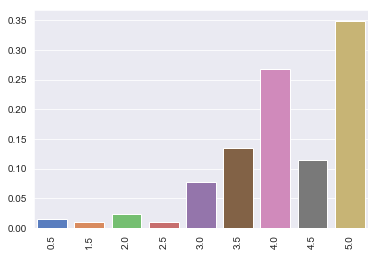

In [12]:
# 评分分析: 柱状图
rate = data['rate'].value_counts()

sns.set_style("darkgrid")
bar_plot = sns.barplot(x=rate.index,y=(rate.values/sum(rate)),palette="muted")
plt.xticks(rotation=90)
plt.show()

Help on set object:

class set(object)
 |  set() -> new empty set object
 |  set(iterable) -> new set object
 |  
 |  Build an unordered collection of unique elements.
 |  
 |  Methods defined here:
 |  
 |  __and__(self, value, /)
 |      Return self&value.
 |  
 |  __contains__(...)
 |      x.__contains__(y) <==> y in x.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iand__(self, value, /)
 |      Return self&=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __ior__(self, value, /)
 |      Return self|=value.
 |  
 |  __isub__(self, value, /)
 |      Return self-=value.
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __ixor__(self, value, /)
 |      Return self^=value.


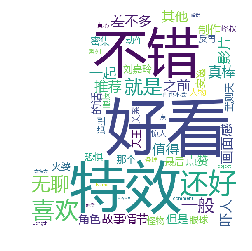

In [20]:
# 云图
#分词

stopwords = STOPWORDS.copy()
print(" STOPWORDS.copy()",help(STOPWORDS.copy()))
#可以自行加多个屏蔽词，也可直接下载停用词表格
stopwords.add("电影")
stopwords.add("一部")
stopwords.add("一个")
stopwords.add("没有")
stopwords.add("什么")
stopwords.add("有点")
stopwords.add("这部")
stopwords.add("这个")
stopwords.add("不是")
stopwords.add("真的")
stopwords.add("感觉")
stopwords.add("觉得")
stopwords.add("还是")
stopwords.add("特别")
stopwords.add("非常")
stopwords.add("可以")
stopwords.add("因为")
stopwords.add("为了")
stopwords.add("比较")
print (stopwords)

# 背景图片
backgroud_Image = plt.imread('film.jpg')

#设置词云参数
#参数分别是指定字体/背景颜色/最大的词的大小,使用给定图作为背景形状
wc =WordCloud(width=500,height=500,
              background_color='white',
              mask = backgroud_Image,
              font_path='msyh.ttf', 
              stopwords=stopwords,
              max_font_size=150,
              random_state=25)

# 分词
comment = jieba.cut(str(data["comment"]),cut_all=False)
wl_space_split= " ".join(comment)

#将分词后数据传入云图
wc.generate_from_text(wl_space_split)


# 显示图片
plt.imshow(wc)
plt.axis('off')#不显示坐标轴
plt.show()

#保存结果到本地
wc.to_file(r'film_wordcloud.jpg')
